###Cargar Base de Datos Data_Plantas_Python_1

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/sunai/data_plantas_python_1_1.xlsx', sheet_name= 'planta1', header = 0, usecols = 'A,B,L,M')

Mounted at /content/drive


In [2]:
df.dtypes

id_i                         int64
fecha_im            datetime64[ns]
active_energy_im             int64
active_power_im            float64
dtype: object

###Modelar Base de Datos

In [4]:
cabecera = ('IDinversores', 'FechaHoras', 'ActiveEnergy', 'ActivePower')
df.columns = cabecera
df.dropna(axis = 0, inplace = True) 
df.ActivePower = df.ActivePower.astype(int)
df['FechaHoras'] = df['FechaHoras'].dt.strftime('%-H:%M')
df

,IDinversores,FechaHoras,ActiveEnergy,ActivePower
399,4801,6:35,75206504,9
402,4799,6:40,76893104,28
404,4801,6:40,75206504,59
406,4803,6:40,59063500,42
407,4800,6:40,73118104,27
...,...,...,...,...
1225,4800,20:00,73202504,87
1227,4799,20:05,76978296,61
1228,4804,20:05,65802100,20
1229,4801,20:05,75294296,65


###Valor Máximo y Minimo Por IDinversor del Active Energy

In [6]:
df.groupby("IDinversores")
by_Active = df.groupby("IDinversores")
by_Active.describe()

ActiveEnergy                                                      \
                    count          mean           std         min         25%   
IDinversores                                                                    
4799                109.0  7.693876e+07  33830.417069  76893104.0  76900304.0   
4800                119.0  7.316170e+07  33062.537506  73118104.0  73125856.0   
4801                115.0  7.525127e+07  33815.468446  75206504.0  75215200.0   
4802                111.0  4.743626e+07  21795.294315  47407500.0  47412800.0   
4803                137.0  5.909948e+07  25948.599120  59063500.0  59070600.0   
4804                116.0  6.575957e+07  33475.454005  65715304.0  65723203.0   

                                                 ActivePower               \
                     50%         75%         max       count         mean   
IDinversores                                                                
4799          76948904.0  76973600.0  76978296.0       109.0  5295.678899   
4800          73170504.0  73195600.0  73202504.0       119.0  5564.218487   
4801          75259200.0  75285352.0  75294296.0       115.0  6007.565217   
4802          47441404.0  47458500.0  47463700.0       111.0  3783.081081   
4803          59107596.0  59125500.0  59130600.0       137.0  4459.072993   
4804          65768200.0  65794354.0  65802100.0       116.0  6067.758621   

                                                                  
                      std   min     25%     50%     75%      max  
IDinversores                                                      
4799          3954.505264  28.0  2349.0  4290.0  7728.0  16310.0  
4800          4046.284326  27.0  2302.0  4905.0  7782.0  16185.0  
4801          4184.132510   9.0  2735.5  5225.0  8052.0  16431.0  
4802          2643.457430  61.0  1774.0  3328.0  5117.5  10855.0  
4803          3141.735172  42.0  2128.0  3912.0  6100.0  13089.0  
4804          4317.445295  20.0  2858.5  5132.0  8267.5  16545.0

###Valor Máximo y Minimo Total del Active Energy

In [7]:
max = df ['ActiveEnergy']. max()
print ('ActiveEnergy max:', max)

ActiveEnergy max: 76978296


In [8]:
min = df ['ActiveEnergy']. min ()
print ('ActiveEnergy min:', min)

ActiveEnergy min: 47407500


###Suma Total del ActivePower por Día

In [9]:
Total = df['ActivePower'].sum()
print ("ActivePower sum:",Total)

ActivePower sum: 3664916


###Generar Gráfica Lineal

Text(0.5, 1.0, 'Gráfica-Planta1(NOV-2022)')

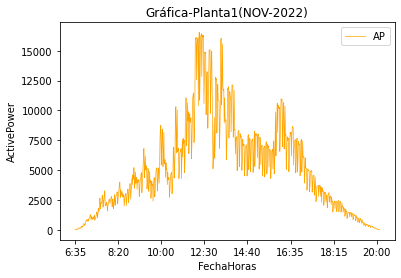

In [5]:
import matplotlib.pyplot as plt
x = df['FechaHoras']
y = df['ActivePower']
df.plot.line(y='ActivePower', x='FechaHoras', c='orange', lw= 0.7, label='AP')
plt.ylabel('ActivePower')
plt.title('Gráfica-Planta1(NOV-2022)')